- 1에서 백업해둔 train.csv, test.csv 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv", sep=',')

train_data

,Unnamed: 0,content,label
0,0,키엘 처음 써보는건데 아직 사용은 안해봐서 잘 모르겠구요 유명한 만큼 좋긴 하겠죠 ...,0
1,1,항상 사용중인 피지오겔 로션 저렴하게 구입했습니다. 배송도 매우 빠릅니다. 잘 받았...,1
2,2,맘에 듭니다 배송도 빠르고 as도 잘 처리해주셨습니다,1
3,3,아토피 피부에 자극없이 좋아요,1
4,4,예전에 쓰다가 이번에 다시 쓰는데 좋네요,1
...,...,...,...
2101,2101,촉촉하고 피부 자극 없는 제품입니다.,1
2102,2102,믿고 구입하는 gs샵인데 이번엔 정말 실망이네요.사용했던 건지 반품된 상품인지 포장...,0
2103,2103,그냥그래요 생각보다 작고 스킨은큰데 ㅡㅡ 세럼 이거 뭐 스킨하나에 세럼 세개사야겟는...,0
2104,2104,아직 사용전이라... 피부에 잘 맞으면 좋겠습니다.,1


In [3]:
test_data = pd.read_csv("test.csv", sep=',')

test_data

,Unnamed: 0,content,label
0,0,쓰던거라 만족하면 사용중이에요,1
1,1,원래쓰던 제품인데 여름엔 너무 안맞네여ㅜㅜ,1
2,2,배송도 빠르고 피부에도 잘맞아서 주문했어요,1
3,3,피부에 잘맞는지 알아보고 구매하는게.. 유분이 정말 많거나 문제성 피부에만 맞는 앰...,0
4,4,"잘 받았습니다. 근데 리뉴얼 버전은 그닥 효과가 없는 것 같네요,",0
...,...,...,...
229,229,추가구성 안와서 보내달라고 했는데 잘 처리해주셔서 감사합니다,1
230,230,처리불만족입니다.,0
231,231,피부다극없고 향도 자극적이지않고 촉촉하니 좋아요,1
232,232,실망 . 진짜 왜 리뉴얼 된건지. 몇년 내내 썻던 제품인데 리뉴얼 된 이후로 안나던...,0


### 2. 데이터 전처리

- 정규표현식을 활용하여 불필요한 특수문자 및 null 값을 제거하였다.

In [4]:
# 파이썬에서 정규표현식 활용을 위한 re 모듈 import
import re

In [5]:
# train_data에서 한글과 공백을 제외하고 모두 제거
train_data['content'] = train_data['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

# 제품명 모두 제거
train_data['content'] = train_data['content'].str.replace("피지오겔","")
train_data['content'] = train_data['content'].str.replace("피지 오겔","")
train_data['content'] = train_data['content'].str.replace("키엘","")
train_data['content'] = train_data['content'].str.replace("더랩","")
train_data['content'] = train_data['content'].str.replace("바이랑두","")

train_data['content'] = train_data['content'].str.replace('^ +', "")
train_data['content'].replace('', np.nan, inplace=True)

# null 값 제거
train_data = train_data.dropna(how = 'any')

# 전처리 결과
print('전처리 후 train 결과: ', len(train_data))

전처리 후 train 결과:  2097


<ipython-input-5-e22683335ee4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['content'] = train_data['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-5-e22683335ee4>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['content'] = train_data['content'].str.replace('^ +', "")


In [6]:
# test_data에서 한글과 공백을 제외하고 모두 제거
test_data['content'] = test_data['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

# 제품명 모두 제거
test_data['content'] = test_data['content'].str.replace("피지오겔","")
test_data['content'] = test_data['content'].str.replace("피지 오겔","")
test_data['content'] = test_data['content'].str.replace("키엘","")
test_data['content'] = test_data['content'].str.replace("더랩","")
test_data['content'] = test_data['content'].str.replace("바이랑두","")

test_data['content'] = test_data['content'].str.replace('^ +', "")
test_data['content'].replace('', np.nan, inplace=True)

# null 값 제거
test_data = test_data.dropna(how = 'any')

# 전처리 결과
print('전처리 후 train 결과: ', len(test_data))

전처리 후 train 결과:  233


<ipython-input-6-704ba5ff7c59>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['content'] = test_data['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-6-704ba5ff7c59>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['content'] = test_data['content'].str.replace('^ +', "")


### 3. 토큰화

- 불용어 제거: 불용어 제거 후 X_train, X_test에 저장
    - 토큰화를 위한 형태소 분석기로 KoNLPy의 okt 모듈 사용

In [7]:
# 토큰화에 필요한 모듈 로드

from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
# 불용어 정의

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [9]:
# train 데이터

okt = Okt()
X_train = []

for sentence in train_data['content']:
    # 토큰화
    temp_X = okt.morphs(sentence, stem=True)
    
    # 불용어 제거
    temp_X = [word for word in temp_X if not word in stopwords]
    
    # 불용어를 제거해서 X_train에 저장
    X_train.append(temp_X)

In [10]:
# 상위 3개의 sample 확인
print(X_train[:3])

[['처음', '써다', '보다', '아직', '사용', '안', '해보다', '자다', '모르다', '유명하다', '만큼', '좋다', '배송', '너무', '느리다', '일주일', '화가', '나다', '사용', '해보다', '괜찮다', '좋다'], ['항상', '사용', '중', '인', '로션', '저렴하다', '구입', '배송', '매우', '빠르다', '자다', '받다'], ['맘', '듭니', '다', '배송', '빠르다', '자다', '처리', '해주다']]


In [11]:
# test 데이터

X_test = []

for sentence in test_data['content']:
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]
    X_test.append(temp_X)

### 4. 정수 인코딩

- 등장 빈도가 높은 순대로 정수 부여 (높은 값일 수록 등장 빈도수 낮음)
- 빈도 수가 2회 보다 낮은 경우 배제

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [13]:
# threshold보다 작은 단어의 비중 확인
# 여기서 threshold는 3회로 설정

threshold = 3
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

# 단어와 빈도수의 쌍(pair)을 key와 value로 받음
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    
    # 단어의 등장 빈도수가 threshold보다 작으면 rare_cnt + 1, rare_freq에 추가
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 3816
등장 빈도가 2번 이하인 희귀 단어의 수: 2239
단어 집합에서 희귀 단어의 비율: 58.67400419287212
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.1757903049137735


In [14]:
# 0번 패딩 토큰을 고려하여 1을 더해줌(0번은 패딩을 위한 토큰)
vocab_size = total_cnt - rare_cnt + 1

print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 1578


In [15]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [16]:
# 정수 인코딩 결과

print(X_train[:3])

[[76, 13, 6, 109, 5, 18, 135, 16, 34, 187, 356, 1, 9, 22, 160, 370, 761, 97, 5, 135, 112, 1], [49, 5, 82, 136, 15, 47, 54, 9, 435, 50, 16, 30], [281, 954, 36, 9, 50, 16, 635, 144]]


In [17]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

- 빈도 수 적은 단어 제거 후 생성된 empty sample 제거

In [18]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

# empty 샘플 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

# 샘플 개수 확인
print(len(X_train))
print(len(y_train))

2095
2095


C:\Users\sua91\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


### 5. 패딩

- 서로 다른 길이의 sample을 패딩을 통해 동일하게 맞춰줌

In [19]:
# 가장 길이가 긴 리뷰와 전체 길이 분포
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))

리뷰의 최대 길이 : 241
리뷰의 평균 길이 : 17.39379474940334


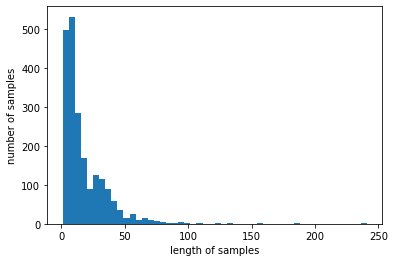

In [20]:
# 대체적으로 70자 내외의 길이를 가짐을 확인

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [21]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [22]:
# 전체 train data 중 98%의 리뷰가 70자 이하의 길이를 가짐을 확인
max_len = 70
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 70 이하인 샘플의 비율: 98.23389021479714


In [23]:
# 모든 sample의 길이를 70으로 맞춰줌.
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

### 6. LSTM으로 쇼핑 상품 리뷰 감성 분류하기

In [24]:
# 필요한 모듈 로드

from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

- 분류 모델로는 LSTM을, activation function으로는 relu를 사용
- 추가적으로 과적합 방지를 위해 dropout 추가

In [25]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(120))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [26]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [27]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# epoch: 15로 설정
# train data의 20%를 검증 데이터로 사용
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
28/28 [==============================] - ETA: 0s - loss: 0.6326 - acc: 0.6784- ETA: 0s - loss: 0.6677
Epoch 00001: val_acc improved from -inf to 0.83771, saving model to best_model.h5
28/28 [==============================] - 3s 99ms/step - loss: 0.6326 - acc: 0.6784 - val_loss: 0.4780 - val_acc: 0.8377
Epoch 2/15
28/28 [==============================] - ETA: 0s - loss: 0.4079 - acc: 0.8377
Epoch 00002: val_acc improved from 0.83771 to 0.84726, saving model to best_model.h5
28/28 [==============================] - 2s 74ms/step - loss: 0.4079 - acc: 0.8377 - val_loss: 0.3623 - val_acc: 0.8473
Epoch 3/15
28/28 [==============================] - ETA: 0s - loss: 0.2834 - acc: 0.9010
Epoch 00003: val_acc did not improve from 0.84726
28/28 [==============================] - 2s 84ms/step - loss: 0.2834 - acc: 0.9010 - val_loss: 0.3666 - val_acc: 0.8425
Epoch 4/15
28/28 [==============================] - ETA: 0s - loss: 0.2370 - acc: 0.9153
Epoch 00004: val_acc improved from 0.84726 

In [28]:
# 검증 데이터의 정확도 가장 높은 모델인 'best_model.h5' load
loaded_model = load_model('best_model.h5')

# train accuracy 출력
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

8/8 [==============================] - 0s 15ms/step - loss: 0.4088 - acc: 0.8455

 테스트 정확도: 0.8455


### 7. 리뷰 예측 모델 테스트

- 상품에 대한 리뷰 경향성 예측을 하기 전 각 리뷰에 대해 알맞게 분류하는지 테스트
- sentiment_predict: 작성한 리뷰에 대해 해당 리뷰가 긍정인지 부정인지 예측하는 함수

In [29]:
def sentiment_predict(new_sentence):
    # 동일한 전처리 수행
    # (1) 토큰화
    new_sentence = okt.morphs(new_sentence, stem=True) 
    
    # (2) 불용어 제거
    new_sentence = [word for word in new_sentence if not word in stopwords]
    
    # (3) 정수 인코딩
    encoded = tokenizer.texts_to_sequences([new_sentence]) 
    
    # (4) 패딩
    pad_new = pad_sequences(encoded, maxlen = max_len)
    
    # (5) 예측
    score = float(loaded_model.predict(pad_new)) 
    
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [30]:
sentiment_predict('피부자극이 없어서 순해서 좋네요')

96.12% 확률로 긍정 리뷰입니다.



In [31]:
sentiment_predict('배송이 너무 느린거 아닌가요')

97.31% 확률로 부정 리뷰입니다.



### 8. 특정 상품에 대한 리뷰 경향성 예측 하기

- product_sentiment_predict: 특정 상품에 대한 최신 리뷰 10개를 가져와 해당 상품에 대한 최신 리뷰가 긍정적인지 부정적인지 예측하는 함수

In [32]:
def product_sentiment_predict(new_sentences):
    positive_sent = 0
    negative_sent = 0
    for new_sentence in new_sentences: 
        # 동일한 전처리 수행
        new_sentence = okt.morphs(new_sentence, stem=True) 
        new_sentence = [word for word in new_sentence if not word in stopwords]
        encoded = tokenizer.texts_to_sequences([new_sentence]) 
        pad_new = pad_sequences(encoded, maxlen = max_len)
        score = float(loaded_model.predict(pad_new)) 
    
        if(score > 0.5):
            positive_sent += 1
        else:
            negative_sent += 1
    
    if positive_sent > negative_sent:
        print("해당 상품에 대한 최신 리뷰는 긍정적인 편입니다.")
    elif positive_sent < negative_sent:
        print("해당 상품에 대한 최신 리뷰는 부정적인 편입니다.")
    else:
        print("해당 상품에 대한 최신 리뷰는 중립입니다.")

#### 'AHC 유스래스팅 리얼 아이크림 포페이스 30ml'에 대한 상품 리뷰 감성 분석

- 웹 스크래핑을 통해 최신순 10개의 리뷰를 가져와 적용

In [33]:
url = 'https://search.shopping.naver.com/catalog/25486379522?NaPm=ct%3Dkpv1kf1c%7Cci%3Dcbe0df1180ef5dfd15a98885f45845756d54dd54%7Ctr%3Dslsl%7Csn%3D95694%7Chk%3D0bf8154c4e0c37f45357cd16a362e3b6944e7cfe'

In [35]:
from selenium import webdriver
import time

# 특정 상품에 대한 리뷰 가져오기
product_content=[]

driver = webdriver.Chrome('./chromedriver')
driver.implicitly_wait(3)

# 해당 url에 해당하는 페이지를 가져옴
driver.get(url)
    
# 최신순 선택
driver.find_element_by_xpath('//*[@id="section_review"]/div[2]/div[1]/div[1]/a[2]').click()
time.sleep(2)

# 최신 리뷰 10개 스크래핑
for child in range(1, 11): 
    content = driver.find_element_by_css_selector('#section_review > ul > li:nth-child(%s) > div.reviewItems_review__1eF8A > div.reviewItems_review_text__2Bwpa > p' %child)
    time.sleep(2)
    product_content.append(content.text)
    time.sleep(2)

In [36]:
product_sentiment_predict(product_content)

해당 상품에 대한 최신 리뷰는 긍정적인 편입니다.
